# Uitgewerkt voorbeeld van een klasse AB met MOS transistors

In [1]:
from cursusdef import *

In {cite}`jiangFundamentalsAudioClass2017`
wordt de klasse AB werking getoond aan de hand van het schema in {numref}`figbias`. We bestuderen dit schema in meer detail. Eerst bekijken we de voorinsteltak. De 2 weerstanden R, samen met de 2 diodes zorgen ervoor dat zonder aangelegd signaal de spanning $V_i$ gelegen is midden de 2 voedingsspanningen. De 2 weerstanden R zijn dan zo gekozen dat de $I_B$ een DC stroomcomponenten heeft die mooi kan ingesteld worden door R.

Wanneer we vervolgens een AC signaal aanleggen, krijgen we de volgende signalen:
* $V_I+V_D$ aan de ingang van de nMOS transistor $M_N$
* $V_I-V_D$ aan de ingang van de pMOS transistor $M_P$

Onder zo goed als alle omstandigheden zullen zowel de nMOS als de pMOS in saturatie zijn. Dit wil zeggen dat de stromen door deze transistors voldoen aan de vergelijkingen:

$$ I_n=\mu_n C_{ox} \frac{W_n}{2L_n} (V_{GSn} -V_{Tn})^2$$  

als $V_{GSn} >V_{Tn}$

$$ I_p=\mu_p C_{ox} \frac{W_p}{2L_p} (V_{GSp} -V_{Tp})^2$$  

als $V_{GSp} <V_{Tp}$

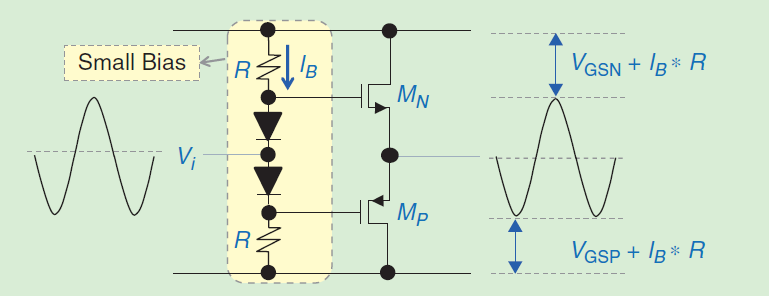

In [3]:
display.Image("./images/ClassB_Bias.png")

Wanneer we de spanning aan de gate en de source invullen krijgen we:

* $ I_n=\mu_n C_{ox} \frac{W_n}{2L_n} (V_I+V_D- V_{out} -V_{Tn})^2$  als $V_I+V_D- V_{out} >V_{Tn}$
* $ I_p=\mu_p C_{ox} \frac{W_p}{2L_p} (V_I-V_D -V_{out}-V_{Tp})^2$   als $V_I-V_D -V_{out} <V_{Tp}$
* $ V_{out}= (I_n -I_p)R_L$

In {numref}`transfer1` berekenen we deze stromen. We veronderstellen hierbij dat:
$\mu_n C_{ox} \frac{W_n}{2L_n}=\mu_p C_{ox} \frac{W_p}{2L_p}=0.02 A/V^2$,$V_D=0.7V$, $V_{Tn}=0.3V$ $V_{Tp}=-0.3V$ en $R_L=80 \Omega$.

In {numref}`transfer1b` zoemen we in op een detail rond de oorsprong.

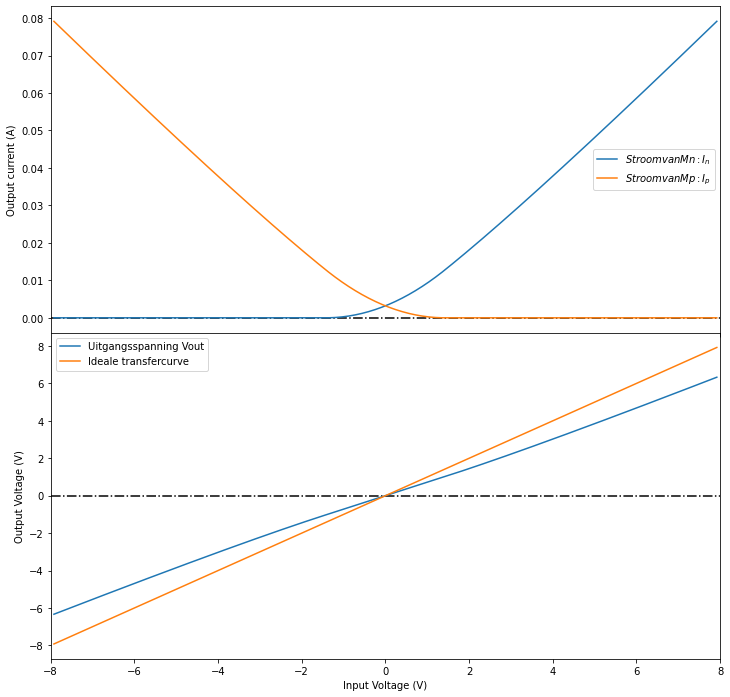

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Inmos(K,VGS,VT):
    if (VGS-VT)>0:
        return K*(VGS-VT)**2
    else:
        return 0
def Ipmos(K,VGS,VT):
    if (VGS-VT)<0:
        return K*(VGS-VT)**2
    else:
        return 0

def klasseBtransferplot(Vmax,Kp=0.02,Kn=0.02,Vd=0.7,vtp=-0.3,vtn=0.3,RL=80):
    vii=np.arange(0,Vmax,Vmax/100) # sweeping up
    Avout=[]
    Aiin=[]
    Aiip=[]
    voo=0
    for vi in vii:
        vgn=vi+Vd
        vgp=vi-Vd
        for ii in range(40):
            vgsn=vgn-voo
            vgsp=vgp-voo
            voo2=RL*(Inmos(Kn,vgsn,vtn)-Ipmos(Kp,vgsp,vtp))
            voo=(4*voo+voo2)/5
        Avout.append(voo)
        Aiin.append(Inmos(Kn,vgsn,vtn))
        Aiip.append(Ipmos(Kp,vgsp,vtp))
    vii=np.arange(0,-Vmax,-Vmax/100)  # sweeping down
    Bvout=[]
    Biin=[]
    Biip=[]
    voo=0
    for vi in vii:
        vgn=vi+Vd
        vgp=vi-Vd
        for ii in range(40):
            vgsn=vgn-voo
            vgsp=vgp-voo
            voo2=RL*(Inmos(Kn,vgsn,vtn)-Ipmos(Kp,vgsp,vtp))
            voo=(4*voo+voo2)/5
        Bvout.append(voo)
        Biin.append(Inmos(Kn,vgsn,vtn))
        Biip.append(Ipmos(Kp,vgsp,vtp))
        
    vii=np.arange(-Vmax+Vmax/100,Vmax,Vmax/100) # double sweep
    
    vout=Bvout[::-1]+Avout[1:]
    iin=Biin[::-1]+Aiin[1:]
    iip=Biip[::-1]+Aiip[1:]
    fig, ax = plt.subplots(2, figsize=(12,12), sharex=True)
    fig.subplots_adjust(hspace=0)
    ax[0].axhline(linestyle="-.",color='black')
    ax[1].axhline(linestyle="-.",color='black')
    ax[1].plot(vii,vout,label="Uitgangsspanning Vout")
    ax[1].plot(vii,vii,label="Ideale transfercurve")
    ax[0].plot(vii,iin,label="$Stroom van Mn: I_n$")
    ax[0].plot(vii,iip,label="$Stroom van Mp: I_p$")
    ax[1].set_xlabel("Input Voltage (V)")
    ax[0].set_ylabel("Output current (A)")  
    ax[1].set_ylabel("Output Voltage (V)")
    ax[1].set_xlim(-Vmax,Vmax)
    ax[0].legend()
    ax[1].legend()
    plt.show();

klasseBtransferplot(8)

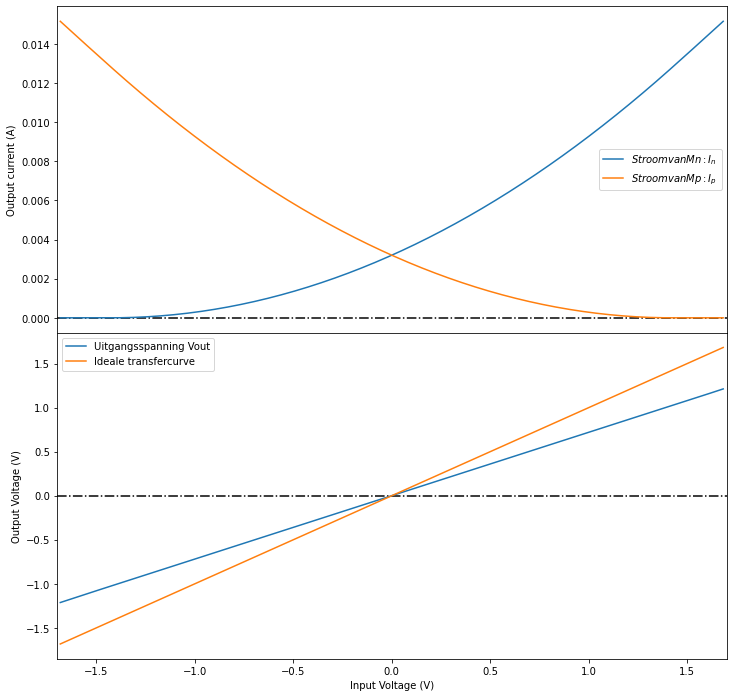

In [2]:
klasseBtransferplot(1.7,RL=80)